<h1>Тестовое задание</h1>

In [1]:
#Подключаюсь к нашей бд
import sqlite3
con = sqlite3.connect("test.sqlite")

import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
sns.set(rc={'figure.figsize':(21,9)})

from statsmodels.tsa.seasonal import STL

from scipy import stats

<h2>1 задание. Функции получения данных из БД в виде pandas dataframe</h2>

Импортирую таблицы целиком, они маленькие

In [2]:
#sql запрос и загружаю таблицу
query_crime = '''select *
from crime'''
df_crime = pd.read_sql_query(query_crime, con)
#меняю формат дат, чтобы они адекватно конвертировались
df_crime['month'] = pd.to_datetime(df_crime.month,format="%Y-%d-%m")

df_crime.shape

(3075, 3)

In [3]:
#sql запрос и загружаю таблицу
query_budget = ''' select *
from budget'''
df_budget = pd.read_sql_query(query_budget, con)
df_budget['month'] = pd.to_datetime(df_budget.month,format="%Y-%m-%d")

df_budget.head()

,name,month,value,budget
0,Общегосударственные вопросы,2011-01-01,24.387951,fed
1,Национальная оборона,2011-01-01,23.156493,fed
2,Национальная безопасность и правоохранительная...,2011-01-01,72.749239,fed
3,Национальная экономика,2011-01-01,39.444211,fed
4,Жилищно-коммунальное хозяйство,2011-01-01,15.926638,fed


<h2>2 задание. Создать визуализацию общего числа преступлений</h2>

In [4]:
# оставляю только общее число преступлений
df_total_crimes = df_crime[df_crime.crime == 'Total_crimes']

<h3>По месяцам</h3>

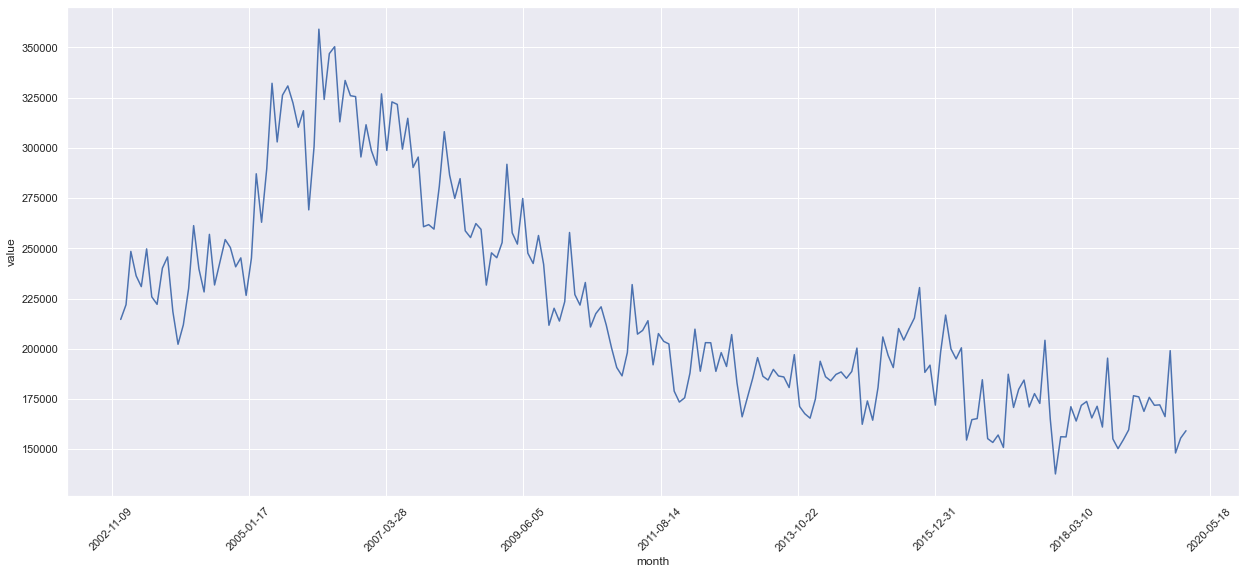

In [5]:
ax=sns.lineplot(data=df_total_crimes,x='month',y='value')
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

<h3>По кварталам</h3>

In [6]:
df_total_crimes_q=df_total_crimes.groupby(df_total_crimes['month'].dt.to_period('Q'), as_index=False).agg({'month':'min','value':'sum'})

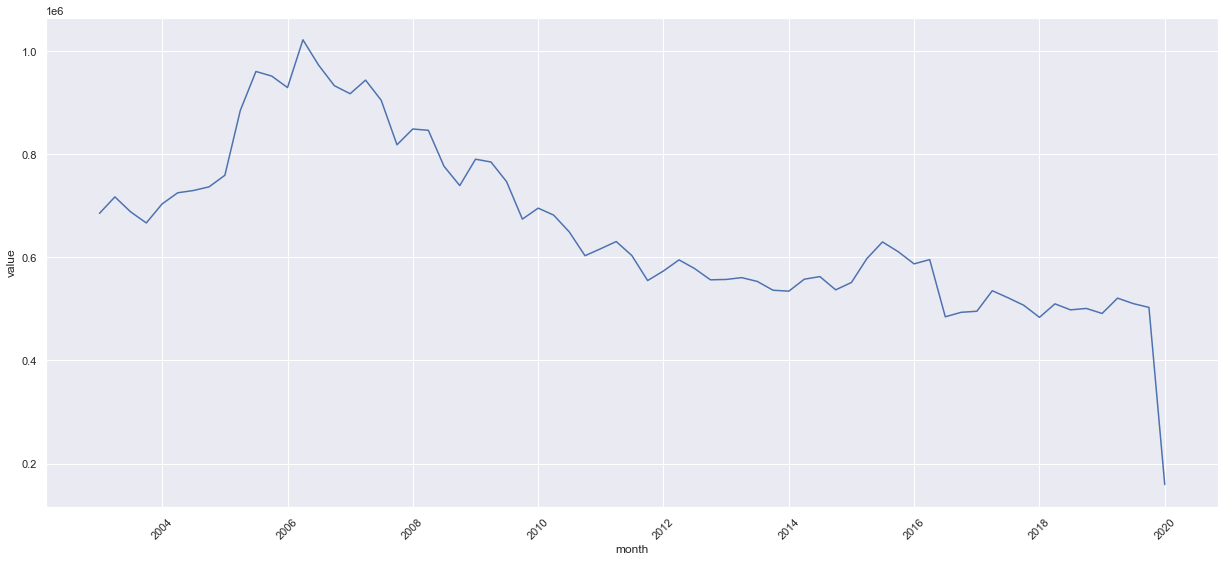

In [7]:
ax=sns.lineplot(data=df_total_crimes_q,x='month',y='value')
plt.xticks(rotation=45)
plt.show()

<h3>По годам</h3>

In [8]:
df_total_crimes_y=df_total_crimes.groupby(df_total_crimes['month'].dt.to_period('Y'), as_index=False).agg({'month':'min','value':'sum'})

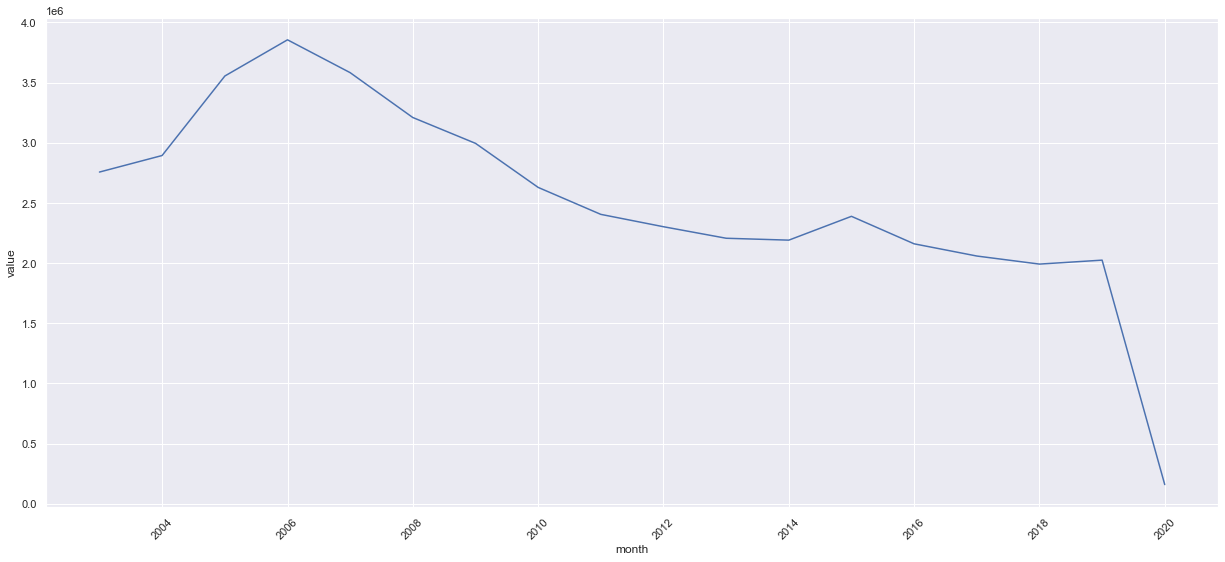

In [9]:
ax=sns.lineplot(data=df_total_crimes_y,x='month',y='value')
plt.xticks(rotation=45)
plt.show()

<h2>2.1 визуализацию по преступлениям я сделал, теперь по бюджету</h2>

In [10]:
# Сначала отбираю только строки с правоохранительной деятельностью и сбрасываю индексы
df_budget_safety=df_budget[df_budget.name == 'Национальная безопасность и правоохранительная деятельность']
df_budget_safety=df_budget_safety.reset_index()
df_budget_safety['value_absolute'] = 0
# Это нужно, чтобы пройтись циклом без лишних проверок и преобразовать накопленные значения в абсолютные
for i in range(len(df_budget_safety)):
    if i==0 or df_budget_safety['month'].dt.to_period('Y').iloc[i] != df_budget_safety['month'].dt.to_period('Y').iloc[i-1]:
        df_budget_safety['value_absolute'].loc[i] = df_budget_safety.at[i,'value']
    else:
        df_budget_safety['value_absolute'].loc[i] = df_budget_safety.at[i,'value']-df_budget_safety.at[i-1,'value']
df_budget_safety.head()

c:\users\п\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,name,month,value,budget,value_absolute
0,2,Национальная безопасность и правоохранительная...,2011-01-01,72.749239,fed,72.749239
1,16,Национальная безопасность и правоохранительная...,2011-02-01,155.074155,fed,82.324916
2,30,Национальная безопасность и правоохранительная...,2011-03-01,248.168354,fed,93.094198
3,44,Национальная безопасность и правоохранительная...,2011-04-01,333.831803,fed,85.663450
4,58,Национальная безопасность и правоохранительная...,2011-05-01,414.693915,fed,80.862112


<h3>По месяцам</h3>

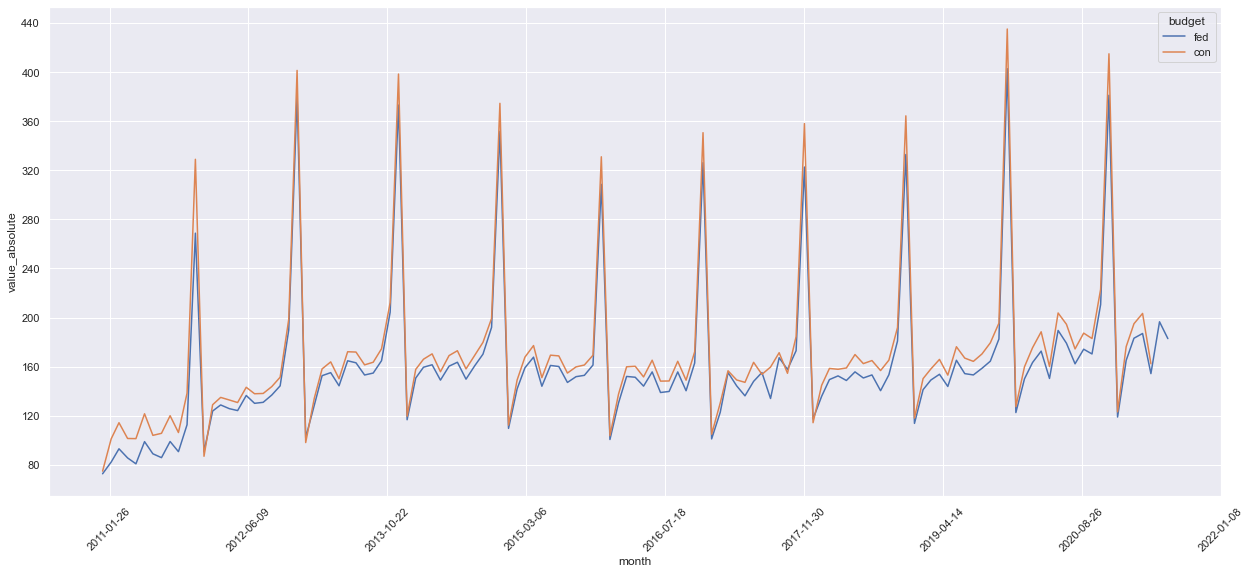

In [11]:
ax=sns.lineplot(data=df_budget_safety,x='month',y='value_absolute',hue='budget')
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

Интересная сезонность данных, как стабильно в конце года года в разы больше бюджета выделяется

<h3>По кварталам</h3>

In [12]:
df_budget_safety_q=df_budget_safety.groupby(df_budget_safety['month'].dt.to_period('Q'), as_index=False).agg({'month':'min','value_absolute':'sum'})

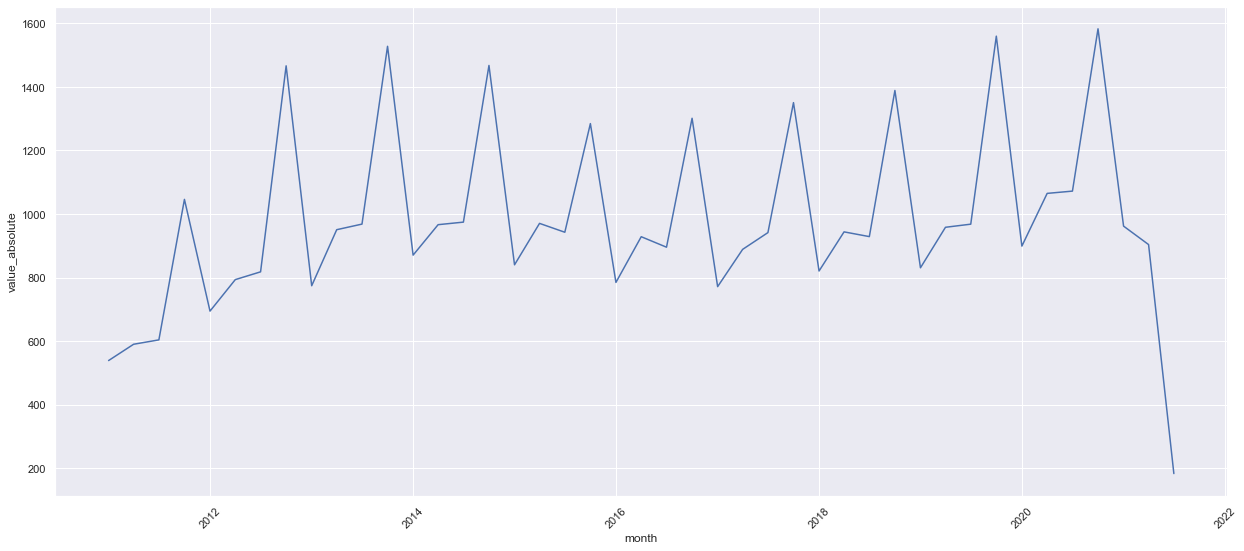

In [13]:
ax=sns.lineplot(data=df_budget_safety_q,x='month',y='value_absolute')
plt.xticks(rotation=45)
plt.show()

<h3>По годам</h3>

In [14]:
df_budget_safety_y=df_budget_safety.groupby(df_budget_safety['month'].dt.to_period('Y'), as_index=False).agg({'month':'min','value_absolute':'sum'})

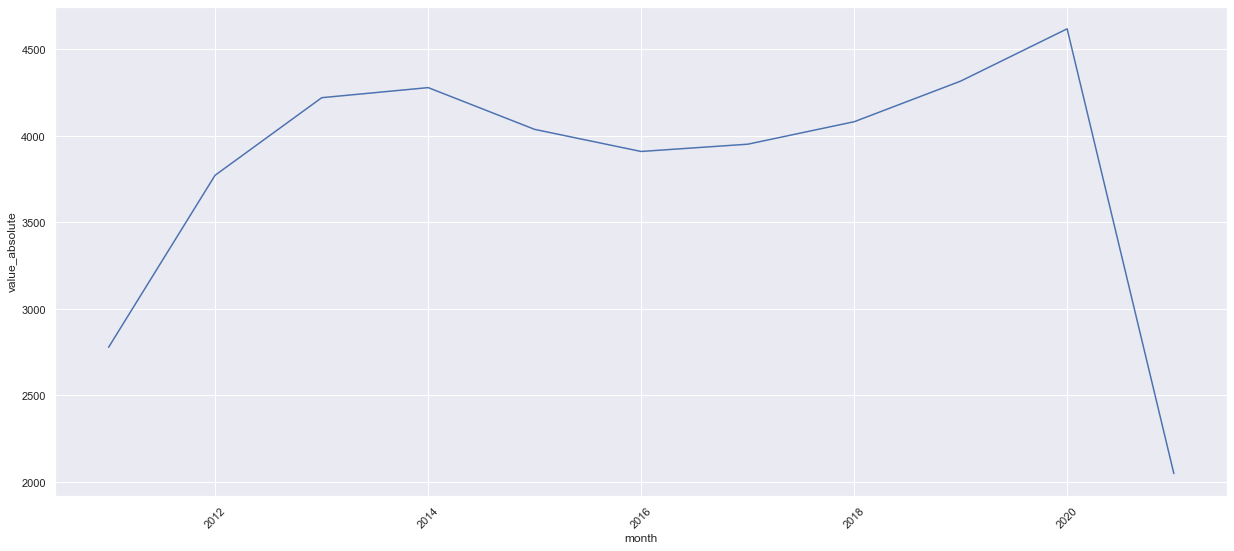

In [15]:
ax=sns.lineplot(data=df_budget_safety_y,x='month',y='value_absolute')
plt.xticks(rotation=45)
plt.show()

<h2> 3 задание. Проверяю взаимосвязь между бюджетом и количеством преступлений</h2>

Подготавливаю данные

In [16]:
# я сложил бюджет, чтобы не дублировались строки
m_df_budget_safety = df_budget_safety.groupby(df_budget_safety['month'], as_index=False).agg({'month':'min','value_absolute':'sum'})
crimes_budget_cor = df_total_crimes[['month','value']].merge(m_df_budget_safety,how='inner', left_on='month',right_on='month')
crimes_budget_cor.head()

,month,value,value_absolute
0,2011-01-01,186489,147.670014
1,2011-02-01,198122,183.565621
2,2011-03-01,231944,207.435108
3,2011-04-01,207259,187.165115
4,2011-05-01,209116,182.243014


<h3>Связь по месяцам</h3>

In [17]:
crimes_budget_cor.corr()

,value,value_absolute
value,1.000000,-0.340522
value_absolute,-0.340522,1.000000


Я решил взять коэффициент корреляции Пирсона. Есть небольшая отрицательная корредяция

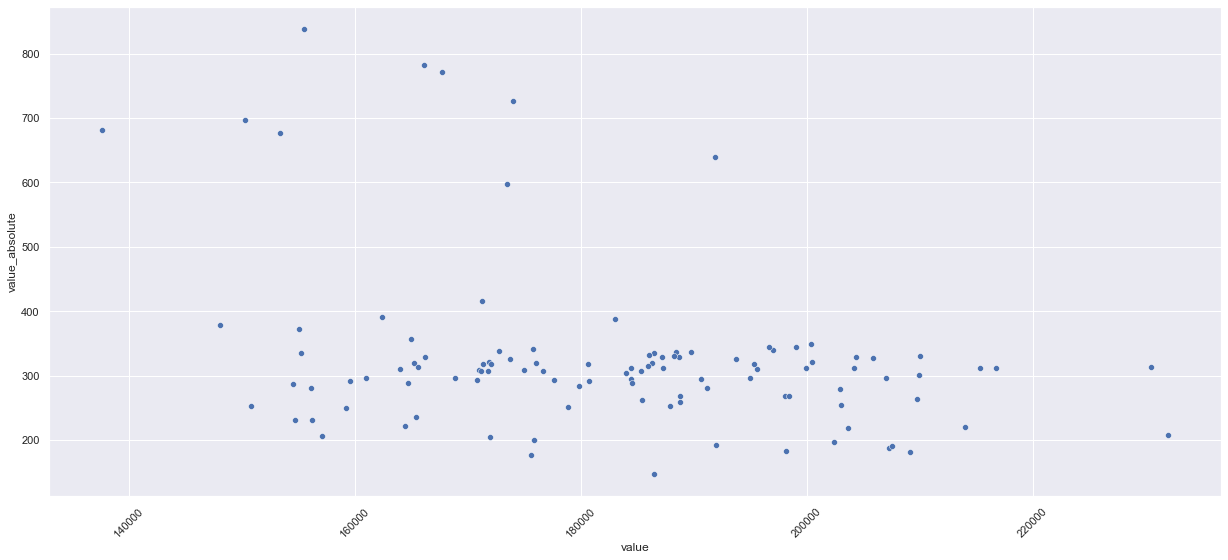

In [18]:
ax=sns.scatterplot(data=crimes_budget_cor,x='value',y='value_absolute')
plt.xticks(rotation=45)
plt.show()

Решил проверить на графике, может взаимосязь нелинейная, но не

Разве что при увеличении бюджета смещаются данные, но нужно проверить их стат. значимость

In [19]:
# делю данные на 2 группы с порогом месячного бюджета в 500
month_cor_group1 = crimes_budget_cor[crimes_budget_cor.value_absolute >=500]['value']
month_cor_group2 = crimes_budget_cor[crimes_budget_cor.value_absolute <500]['value']

stats.ttest_ind(month_cor_group1, month_cor_group2).pvalue

0.001221106965690009

Решил проверить по Т-критерию 2 условно увиденные группы, p-value достаточно низкий, 0.001, я думаю, мы можем практически со 100% вероятностью утверждать, что полученные группы действительно отличаются. <br>
Но это кассается только сильного увеличения бюджета, до определенного порога такой связи не видно. Возможно есть другой фактор, влияющий на результаты

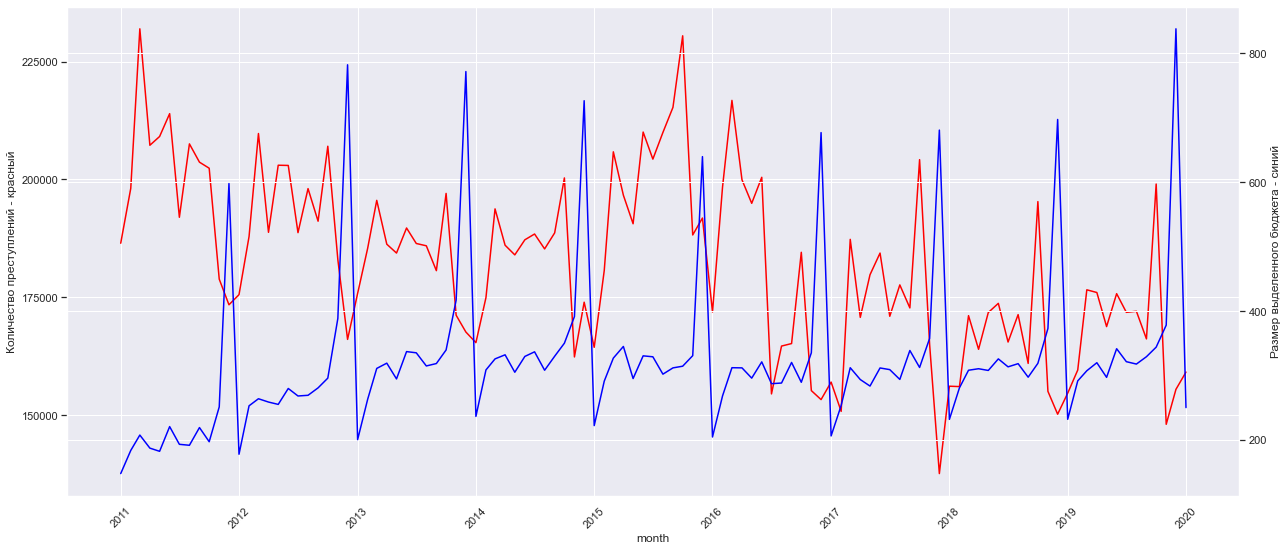

In [20]:
fig,ax = plt.subplots()
ax.plot(crimes_budget_cor.month, crimes_budget_cor.value,color="red")
ax.set_xlabel('month')
ax.set_ylabel('Количество преступлений - красный')
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.xticks(rotation=45)

ax2 =ax.twinx()
ax2.plot(crimes_budget_cor.month,crimes_budget_cor.value_absolute,color="blue")
ax2.set_ylabel('Размер выделенного бюджета - синий')
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))


plt.show()

Также решил сравнить 2 графика напрямую, может есть корреляция при смещении, но нет, результаты в целом схожи с предыдущими проверками

Я доверюсь предыдущим результатам

<h3>Также с кварталами</h3>

In [21]:
crimes_budget_cor_q=crimes_budget_cor.groupby(crimes_budget_cor['month'].dt.to_period('Q')).sum()
crimes_budget_cor_q.head()

,value,value_absolute
month,,
2011Q1,616555,538.670743
2011Q2,630333,589.977983
2011Q3,603212,603.754708
2011Q4,554707,1046.007125
2012Q1,573237,694.341164


In [22]:
# убрал последнюю строчку, так как там недостаток данных получается
crimes_budget_cor_q[:-1].corr()

,value,value_absolute
value,1.000000,-0.354045
value_absolute,-0.354045,1.000000


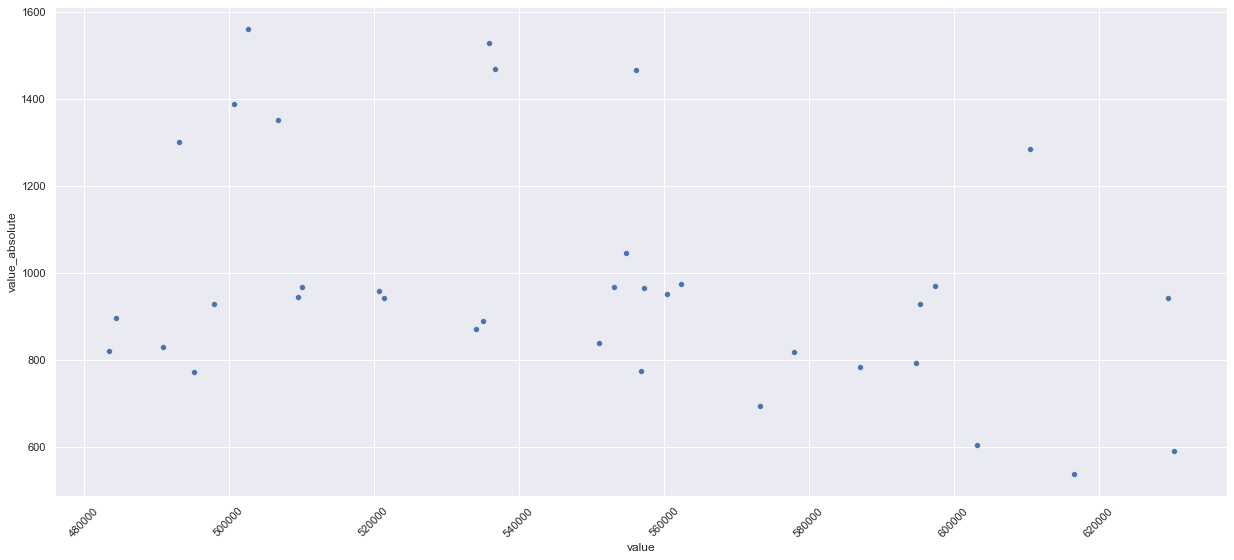

In [23]:
ax=sns.scatterplot(data=crimes_budget_cor_q[:-1],x='value',y='value_absolute')
plt.xticks(rotation=45)
plt.show()

In [24]:
# делю данные на 2 группы с порогом квартального бюджета в 1200
q_cor_group1 = crimes_budget_cor_q[:-1][crimes_budget_cor_q[:-1].value_absolute >=1200]['value']
q_cor_group2 = crimes_budget_cor_q[:-1][crimes_budget_cor_q[:-1].value_absolute <1200]['value']

stats.ttest_ind(q_cor_group1, q_cor_group2).pvalue

0.19868966758637324

При увеличении масштаба наши данные уже не показывают себя так хорошо, 2 десятых для p-value говорят нам об отсутствии значимых различий

Хоть используемых данных получилось и немного, но на квартальном уровне разница уже не так видна

Поскольку данных меньше, то здесь сильнее влияет подъем преступности в конце 2015 года, как раз в конце года увеличиается бюджет

<h3>И с годом</h3>

In [25]:
crimes_budget_cor_y=crimes_budget_cor.groupby(crimes_budget_cor['month'].dt.to_period('Y')).sum()
crimes_budget_cor_y

,value,value_absolute
month,,
2011,2404807,2778.410559
2012,2302168,3772.188682
2013,2206249,4220.944227
2014,2190578,4279.108113
2015,2388476,4037.786045
2016,2160063,3910.081563
2017,2058476,3952.132132
2018,1991532,4082.069614
2019,2024337,4316.800383


In [26]:
crimes_budget_cor_y[:-1].corr()

,value,value_absolute
value,1.000000,-0.593086
value_absolute,-0.593086,1.000000


Здесь мы уже видим обратную корреляцию более заметно, но в 2011 году денег было выделено гораздо меньше, этот выброс видно на графике ниже и он указывает на отсутствие корреляции

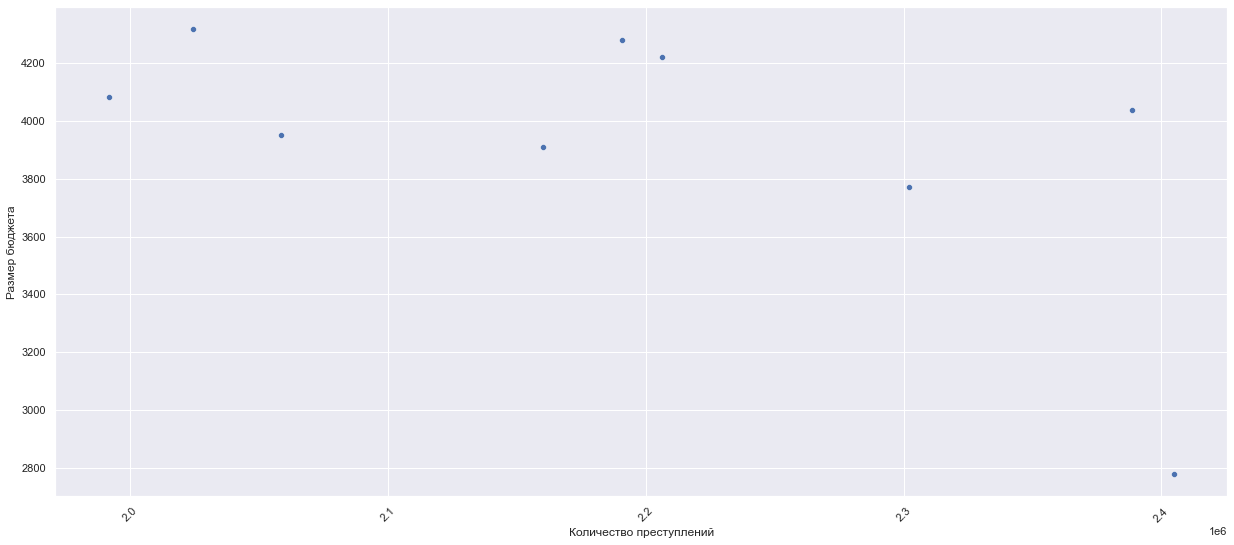

In [36]:
ax=sns.scatterplot(data=crimes_budget_cor_y[:-1],x='value',y='value_absolute')
ax.set_xlabel('Количество преступлений')
ax.set_ylabel('Размер бюджета')
plt.xticks(rotation=45)
plt.show()

Здесь уже нет смысла сравнивать группы, есть 1 выброс в данных, когда в 2011 году бюджет выделили сильно меньше, но значения преступлений примерно на одном уровне

<h2>3.1 Разбиваю таблицу по типам преступлений, чтобы проследить корреляцию более детально</h2>

In [28]:
df_crime_by_type=df_crime.pivot(index='month', columns='crime', values='value').drop(columns=['Total_crimes'])
df_crime_by_type.head()

crime,Drugs,Ecological,Extremism,Fraud_scam,Harm_to_health,Hooligan,Huge_damage,Murder,Rape,Serious,Terrorism,Theft,Vehicle_theft,Weapons
month,,,,,,,,,,,,,,
2003-01-01,16006,1216,13,7731,5559,10560,20162,2749,574,88203,630,81014,3549,4661
2003-02-01,16839,1701,5,7607,4732,10816,20889,2444,515,88863,678,95970,3697,5364
2003-03-01,20176,1817,10,9437,4851,11813,24053,2864,560,101349,809,79420,4327,5938
2003-04-01,16614,2449,10,7824,4722,12636,19754,2919,668,91625,892,95215,5345,5230
2003-05-01,14413,3530,20,7122,4895,12234,17519,2713,688,89615,796,94505,6374,5112


объединяю таблицы, чтобы посмотреть корреляцию и отбрасываю общее количество, так как я уже изучил эту колонку

In [29]:
crimes_budget_cor_by_type = df_crime_by_type.merge(m_df_budget_safety,how='inner', left_on='month',right_on='month')

In [30]:
crimes_budget_cor_by_type.corrwith(crimes_budget_cor_by_type.value_absolute).sort_values()

Serious          -0.519375
Murder           -0.358607
Weapons          -0.357827
Harm_to_health   -0.320744
Drugs            -0.302577
Rape             -0.224743
Hooligan         -0.222126
Ecological       -0.167967
Vehicle_theft    -0.129500
Theft            -0.106582
Extremism        -0.070049
Fraud_scam        0.021944
Terrorism         0.092340
Huge_damage       0.229574
value_absolute    1.000000
dtype: float64

Корреляция Пирсона снова не дает увидеть сильную связь между данными кроме отрицательной корреляции с серьезными преступлениями, -0.5 уже можно увидеть тенденцию

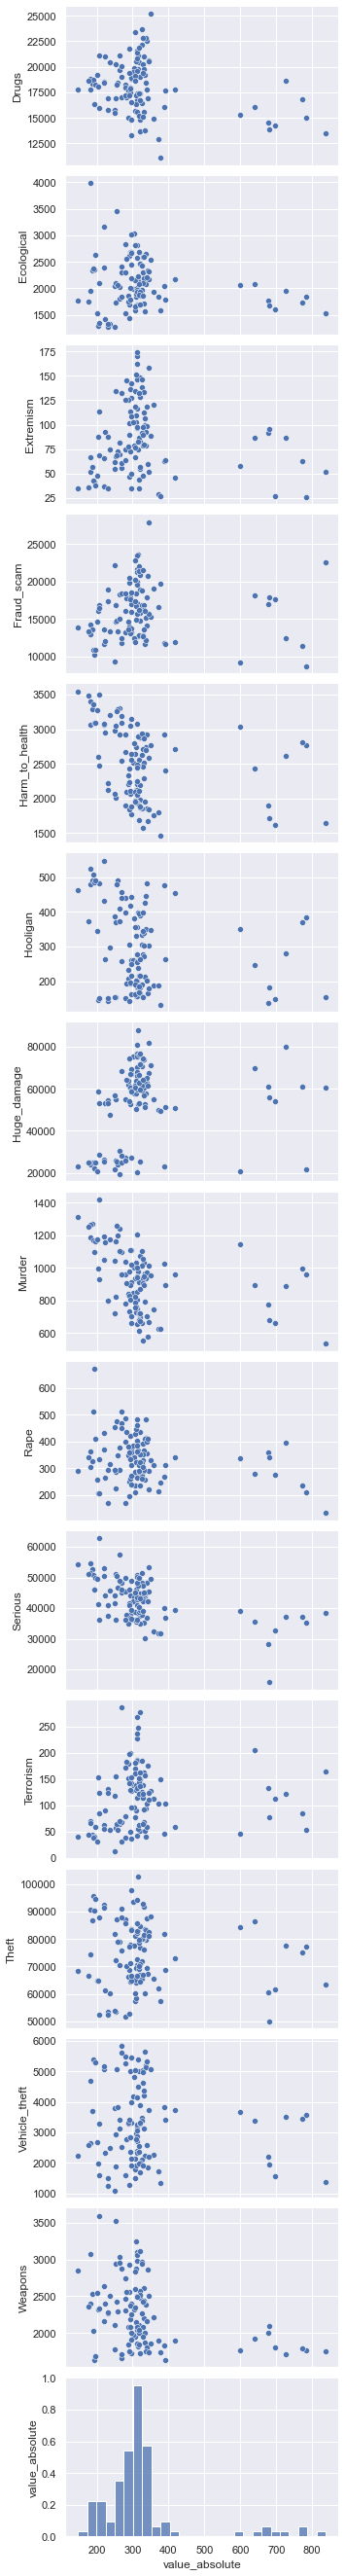

In [31]:
sns.pairplot(crimes_budget_cor_by_type,x_vars='value_absolute',aspect=2)

Но, если смотреть на графики, то взаимосвязь хоть небольшая начинает вырисовываться

Примерно в половине случаев при резком увеличении бюджета, даже на глаз можно увидеть снижение показателей

<h2>4. сезонность</h2>

Я решил использовать stl чтобы увидеть динамику наших данных

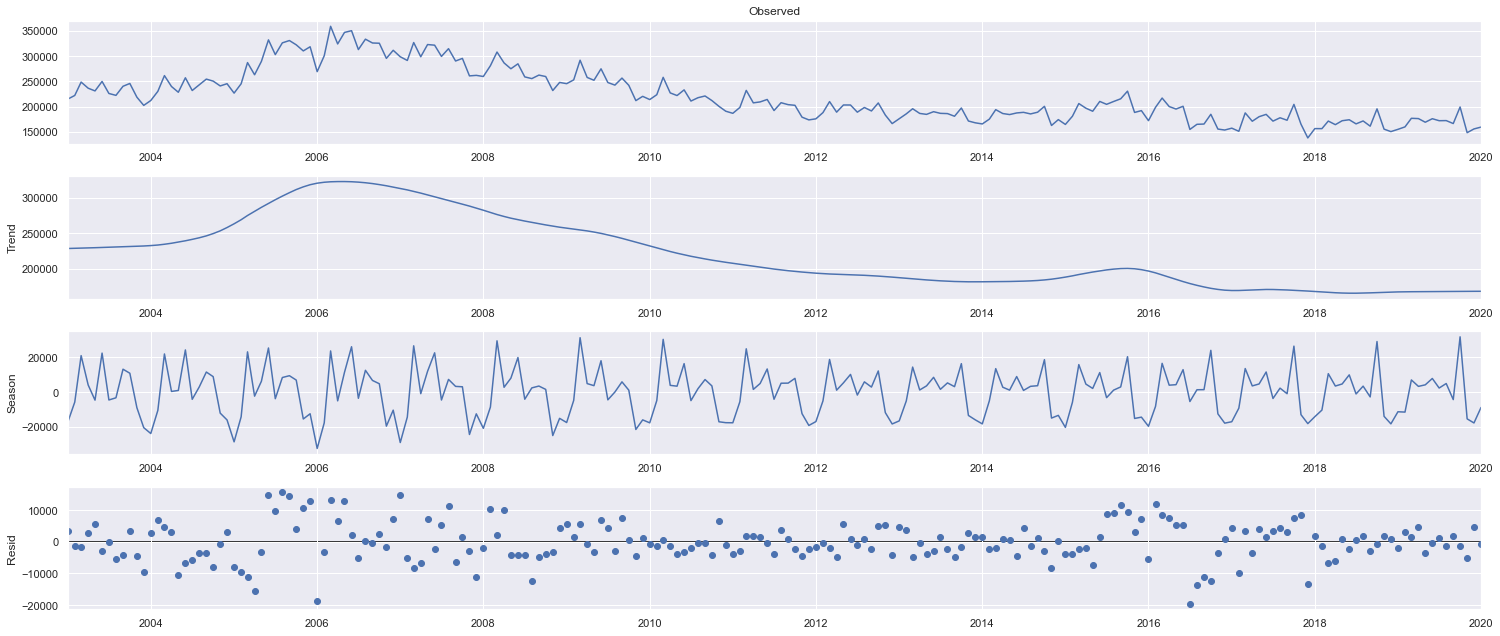

In [32]:
seasons_total_crimes = df_total_crimes[['month','value']]
seasons_total_crimes = seasons_total_crimes.set_index('month')
res = STL(seasons_total_crimes).fit()
res.plot()
plt.show()

<b>Эти графики показывают сезонность наших данных</b>
<ol>
    <li>график нам сейчас не важен, это просто колебание нашей величины преступлений за все время</li>
    <li>график показывает тренд, у нас был пик в 2006 году, но после этого данные снижались с небольшим подъемом в 2015 года</li>
    <li>график как раз указывает сезонность наших данных</li>
    <ul>
        <li>В среднем к началу года у нас снижается количество предступлений, как и растет финансирование, как мы помним</li>
        <li>Но в первой половине года у нас есть несколько резких скачков данных</li>
<li>Также интересно снижение сезонности в первой половине лет и в о второй, видно снижение, начиная с 2001 года, но также там уввеличивается всплеск где-то осенью</li>
    </ul>
    <li>последний график указывает на шум, который не вписывается в нашу сезонность</li>
</ol>

In [33]:
df_total_crimes_avg_month = df_total_crimes.groupby(df_total_crimes['month'].dt.month).agg({'value':'mean'})

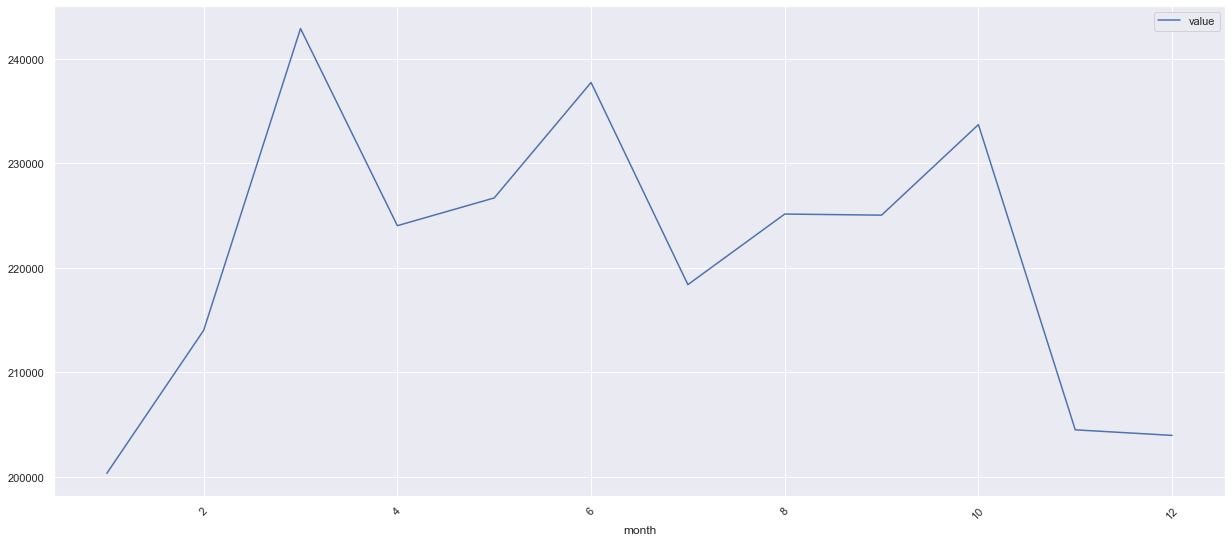

In [34]:
ax=sns.lineplot(data=df_total_crimes_avg_month)
plt.xticks(rotation=45)
plt.show()

Да, график среднего количества преступлений по месяцам показывает примерно те же резульаты, что я озвучил раньше

Единственное, теперь 3 пика в течении года. Март, июнь и октябрь. Но это из-за изменения характера распределения преступлений в течении 17 лет

<h3>Остался последний вопрос, с чем эти закономерности могут быть связаны</h3>

У меня нет ответа, особенно с учетом того, что наоборот к началу года логически должно расти количество преступлений, у людей меньше денег в предверии праздников, в конце года огромный стресс во всех сферах, а также усиливающееся пьянство в конце года


Думаю, ответ где-то не в этих данных. Я бы искал еще в событиях, праздниках, работе правоохранительных органов и так далее